In [15]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('..\..\data\data_raw\*.csv')

# Comparing word choice to number of review comments

An interesting question that arose while conducting our exploratory dataset analysis was whether a reviewer's word choice would garner feedback from other reviewers. Such that, were there specific words that would target or trigger a certain response? Did a negative review get more comments than a positive one?

To do this, we compared the review words to the number of review comments. As we have a large dataset, we focused on analyzing the reviews with more than 50 feedback responses. Below is a plot showing the review words that had most comments:

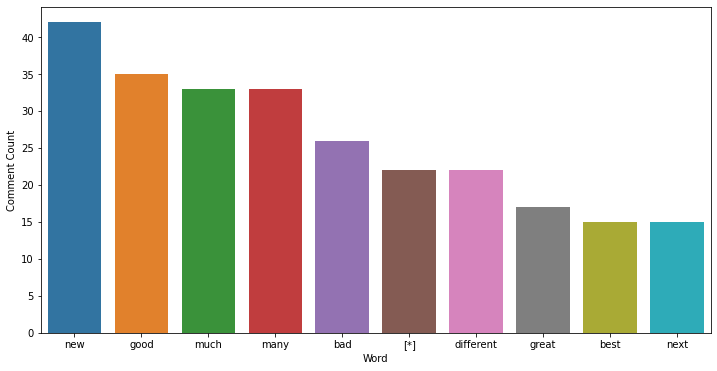

In [23]:
#Limiting data to only contain Review and Comment Count columns
rev_comments = df[['review', 'comment_count']]
data = pd.DataFrame({
    'Review': rev_comments['review'],
    'Comment Count': pd.to_numeric(rev_comments['comment_count'])
})

#Keeping only the reviews with more than 50 comments
over50 = data[data['Comment Count'] > 50]

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag, pos_tag_sents

a = Counter(" ".join(over50["Review"].str.lower()).split()).most_common()
stop_words = set(stopwords.words('english'))

#Filtering out meaningless words using NLTK's stop_words list
b = [(i[0],i[1]) for i in a if i[0] not in stop_words]

#Creating dataframe containing words and their counts
word_counts = pd.DataFrame(b, columns=['Word','Count'])

#Further filtering to only contain adjectives
word_counts['POSTags'] = pos_tag_sents(word_counts['Word'].apply(word_tokenize).tolist())
word_counts['POSTags'] = word_counts['POSTags'].astype(str)
final = word_counts[word_counts['POSTags'].str.contains("JJ")].head(10)

plt.figure(figsize=(12,6))
plot = sns.barplot(x=final['Word'], y=final['Count'])
plot.set(xlabel='Word', ylabel='Comment Count')
plt.show()

As we can see, mostly positive word choices would gain more comments. This is interesting to see as one may thing that negative reviews would gain **more** comments due to backlash from other users since we are analyzing the top games in each genre. But perhaps because these are top games, the ratio between positive and negative reviews is heavily unbalanced, thus the negative comments may get buried among all the positive reviews. 

Something else that we may need to take into consideration was that this analysis was based solely on individual words, which may skew the results of what we are aiming to know: the effect of the *positivity* or *negativity* of the review on comment count. 

What this means is that our analysis didn't take into the consideration of oxymorons like *amazingly awful, terribly good, etc.* in the reviews, which could affect the answer to our research question as now the meaning of the review has changed. However, based on one of our exploratory data analyses, many of the reviews contained less than 10 characters, indicating most reviews would be straightfoward and concise. Thus, it is safe to assume that not many reviews would contain figures of speech like oxymorons.